## Importation des Package

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb, boston_housing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models,layers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud

# Classification Binnaire (Model pour savoir si le commentaire est positive ou négative)

## Chargement des Données

In [38]:
# Charger les données IMDB
max_features = 10000  # Nombre de mots à considérer comme features
max_len = 500  # Couper les textes après ce nombre de mots

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



In [39]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [40]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [41]:
# Charger le dataset IMDB
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

# Charger le dictionnaire qui mappe les indices aux mots
word_index = imdb.get_word_index()

# Inverser le dictionnaire pour obtenir un mapping de l'indice au mot
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Fonction pour convertir une critique de film de la forme d'indices à la forme de mots
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Afficher une critique de film décodée
decoded_review = decode_review(train_data[0])
print("Critique de film décodée :")
print(decoded_review)

# Afficher le label correspondant (0 pour négatif, 1 pour positif)
print("Label correspondant :", train_labels[0])


Critique de film décodée :
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these childre

In [42]:
# Padding des textes
# Cette étape ajuste toutes les séquences de textes à une longueur fixe définie par 'max_len'.
# Le padding ajoute des zéros au début des séquences plus courtes pour atteindre 'max_len'.

# Appliquer le padding sur les données d'entraînement
x_train = pad_sequences(x_train, maxlen=max_len)

# Appliquer le padding sur les données de test
x_test = pad_sequences(x_test, maxlen=max_len)


In [43]:
# Exemple de séquences de texte
sequences = [
    [1, 2, 3],
    [4, 5, 6, 7,78],
    [8, 9]
]

# Longueur maximale des séquences après padding
max_len = 5

# Appliquer le padding
padded_sequences = pad_sequences(sequences, maxlen=max_len)

print(padded_sequences)

[[ 0  0  1  2  3]
 [ 4  5  6  7 78]
 [ 0  0  0  8  9]]


## Model de Deep Learning

In [44]:
# Construire le modèle MLP
model = models.Sequential()
# Ajouter une couche d'Embedding pour convertir les indices de mots en vecteurs d'une dimension de 128
model.add(layers.Embedding(max_features, 128, input_length=max_len))
# Aplatir la sortie de la couche d'Embedding en un vecteur 1D
model.add(layers.Flatten())
# Ajouter une couche Dropout pour réduire le surapprentissage en mettant à zéro 50% des neurones
model.add(layers.Dropout(0.5))
# Ajouter une couche Dense avec 128 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(128, activation='relu'))
# Ajouter une couche de sortie Dense avec une activation sigmoid pour produire une sortie binaire (0 ou 1)
model.add(layers.Dense(1, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compiler le modèle
model.compile(loss='binary_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])


In [47]:
# Entrainer le modèle

# Entraîner le modèle
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6347 - loss: 0.6069 - val_accuracy: 0.8454 - val_loss: 0.3481
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9288 - loss: 0.1822 - val_accuracy: 0.8466 - val_loss: 0.4050
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9764 - loss: 0.0640 - val_accuracy: 0.8582 - val_loss: 0.4901
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9883 - loss: 0.0326 - val_accuracy: 0.8514 - val_loss: 0.5909
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.8472 - val_loss: 0.6260


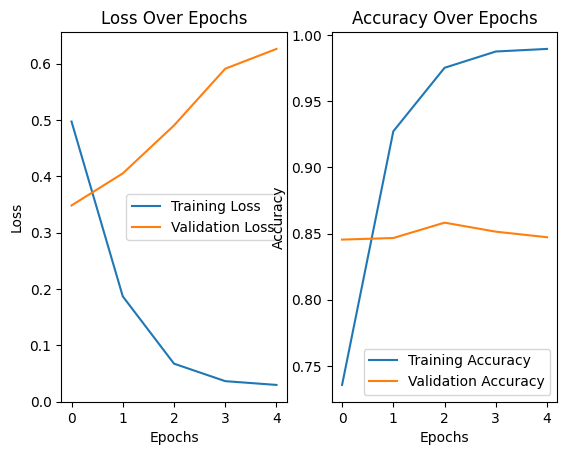

In [48]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
# evaluer le modele
scor, acc = model.evaluate(x_test, y_test)
print(f"test score : {scor}")
print(f"test accuracy : {acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8446 - loss: 0.6020
test score : 0.6071093678474426
test accuracy : 0.8467599749565125


In [50]:
# prediction
y_pred = (model.predict(x_test) >0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [51]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [52]:
# rapport de classification

class_report = classification_report(y_test,y_pred)

# afficher le rapport de classification

print("classification repport")
print(class_report)

classification repport
              precision    recall  f1-score   support

           0       0.91      0.77      0.83     12500
           1       0.80      0.92      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



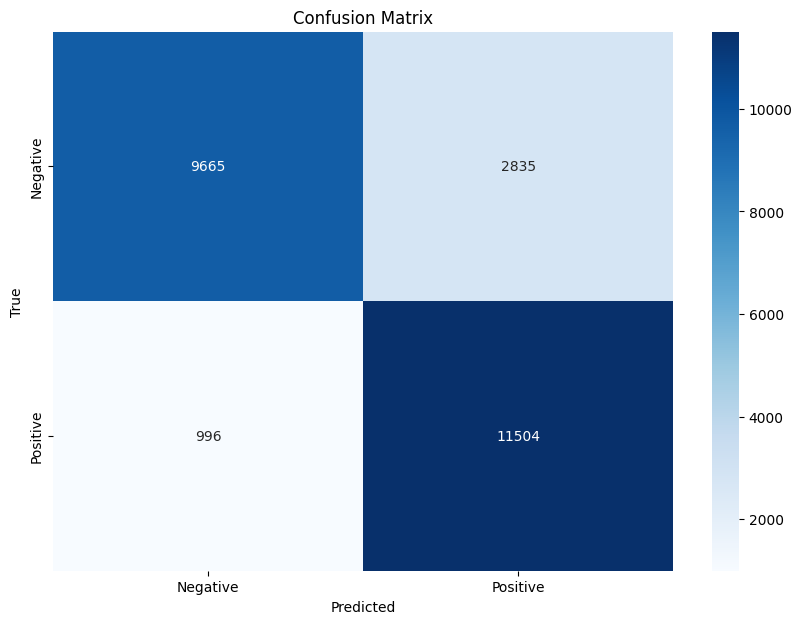

In [53]:
# Afficher la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Regression (Model pour prédire le prix d'un appartement )

In [54]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [55]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [57]:
# Construire le modèle MLP
model = models.Sequential()
# Ajouter une couche Dense d'entrée avec 64 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
# Ajouter une deuxième couche Dense avec 64 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(64, activation='relu'))
# Ajouter une couche de sortie Dense avec une seule neurone (prix de l'immobilier)
model.add(layers.Dense(1))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Compiler le modèle avec les paramètres suivants :
model.compile(
    optimizer=RMSprop(learning_rate=0.001),  # Optimiseur RMSprop avec un taux d'apprentissage de 0.001
    loss='mse',                             # Fonction de perte : Erreur quadratique moyenne (Mean Squared Error)
    metrics=['mae']                         # Métrique d'évaluation : Erreur absolue moyenne (Mean Absolute Error)
)


In [59]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 549.6386 - mae: 21.5543 - val_loss: 563.5823 - val_mae: 21.9541
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 472.0724 - mae: 19.8522 - val_loss: 488.8154 - val_mae: 20.2219
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 411.7414 - mae: 18.2601 - val_loss: 414.7398 - val_mae: 18.3204
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 345.7898 - mae: 16.3740 - val_loss: 331.1293 - val_mae: 16.0521
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 257.8943 - mae: 13.6805 - val_loss: 252.0283 - val_mae: 13.5838
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 213.1552 - mae: 12.3943 - val_loss: 177.9795 - val_mae: 10.9546
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.7073 - mae: 9.1643 - val_loss: 119.6404 - val_mae: 8.4419
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81.2963 - mae: 7.1626 - val_loss: 86.6388 - val_mae: 6.9382
Epoch 9/100
11/11 ━━

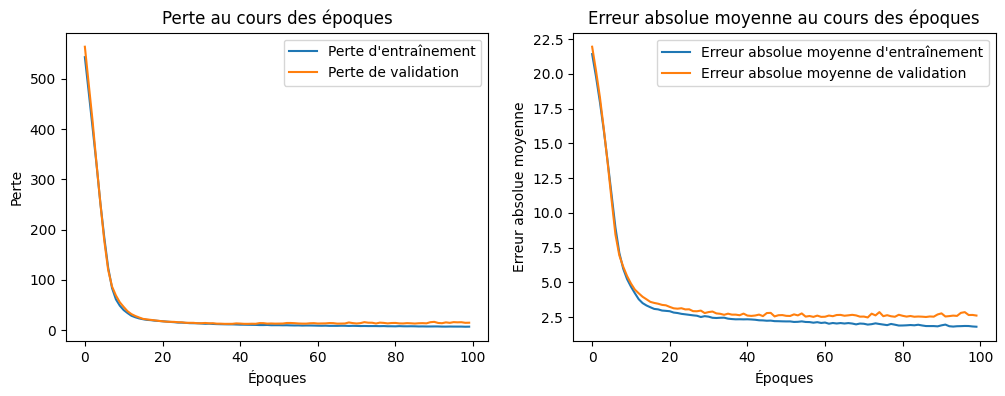

In [60]:
# Tracer les courbes de perte et d'erreur absolue moyenne
plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au cours des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbe d'erreur absolue moyenne
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Erreur absolue moyenne d\'entraînement')
plt.plot(history.history['val_mae'], label='Erreur absolue moyenne de validation')
plt.title('Erreur absolue moyenne au cours des époques')
plt.xlabel('Époques')
plt.ylabel('Erreur absolue moyenne')
plt.legend()

plt.show()


In [61]:
# Évaluer le modèle
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Perte sur les données de test: {test_loss}')
print(f'Erreur absolue moyenne sur les données de test: {test_mae}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.3676 - mae: 2.7790
Perte sur les données de test: 21.52664566040039
Erreur absolue moyenne sur les données de test: 2.9983932971954346


In [62]:
# Prédire les prix avec le modèle
y_pred = model.predict(x_test)

# Afficher quelques prédictions et les valeurs réelles
for i in range(10):
    print(f'Prix prédit: {y_pred[i][0]:.2f}, Prix réel: {y_test[i]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prix prédit: 7.49, Prix réel: 7.2
Prix prédit: 20.47, Prix réel: 18.8
Prix prédit: 22.38, Prix réel: 19.0
Prix prédit: 30.47, Prix réel: 27.0
Prix prédit: 26.08, Prix réel: 22.2
Prix prédit: 20.92, Prix réel: 24.5
Prix prédit: 27.73, Prix réel: 31.2
Prix prédit: 22.96, Prix réel: 22.9
Prix prédit: 20.41, Prix réel: 20.5
Prix prédit: 21.41, Prix réel: 23.2


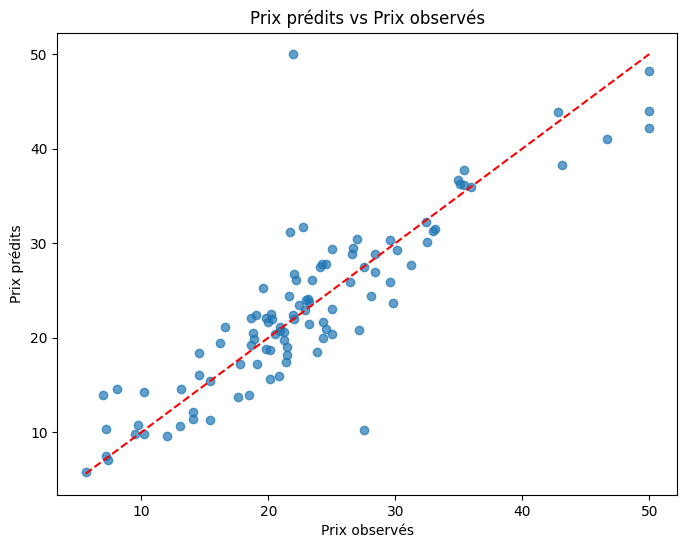

In [63]:
# Tracer les valeurs prédites en fonction des valeurs observées
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Prix observés')
plt.ylabel('Prix prédits')
plt.title('Prix prédits vs Prix observés')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ajouter une ligne de référence
plt.show()